CMS compiles claims data for Medicare and Medicaid patients across a variety of categories and years. This includes Inpatient and Outpatient claims, Master Beneficiary Summary Files, and many other files. Indicators from this data source have been computed by personnel in CDC's Division for Heart Disease and Stroke Prevention (DHDSP).

The system is designed to integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated risk factors in the United States. The data are organized by location (national and state) and indicator. The data can be plotted as trends and stratified by sex and race/ethnicity.

# **Importing necessary libraries**

In [85]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
data= pd.read_csv("C:\\Users\\deepk\\Downloads\\heart_disease_data.csv\\heart_disease_data.csv")

# **Data Summarization**

In [88]:
data.head()

Year LocationAbbr   LocationDesc DataSource PriorityArea1  PriorityArea2  \
0  2006           US  United States   Medicare           NaN            NaN   
1  2005           US  United States   Medicare           NaN            NaN   
2  2007           US  United States   Medicare           NaN            NaN   
3  2008           US  United States   Medicare           NaN            NaN   
4  2004           US  United States   Medicare           NaN            NaN   

  PriorityArea3  PriorityArea4                 Category  \
0           NaN            NaN  Cardiovascular Diseases   
1           NaN            NaN  Cardiovascular Diseases   
2           NaN            NaN  Cardiovascular Diseases   
3           NaN            NaN  Cardiovascular Diseases   
4           NaN            NaN  Cardiovascular Diseases   

                    Topic  ... Break_Out_Category Break_Out CategoryId  \
0           Heart Failure  ...               Race     Other         C1   
1           Heart Failure  ...               Race     Other         C1   
2  Coronary Heart Disease  ...                Age       65+         C1   
3  Coronary Heart Disease  ...             Gender    Female         C1   
4           Heart Failure  ...            Overall   Overall         C1   

   TopicId  IndicatorID Data_Value_TypeID BreakOutCategoryId  BreakOutId  \
0       T5        MD501             Crude              BOC04       RAC07   
1       T5        MD501             Crude              BOC04       RAC07   
2       T4        MD301             Crude              BOC03       AGE06   
3       T4        MD301             Crude              BOC02       GEN02   
4       T5        MD501             Crude              BOC01       OVR01   

   LocationID GeoLocation  
0          59         NaN  
1          59         NaN  
2          59         NaN  
3          59         NaN  
4          59         NaN  

[5 rows x 29 columns]

In [89]:
data.tail()

Year LocationAbbr LocationDesc DataSource   PriorityArea1  \
42635  2012           CO     Colorado   Medicare  Million Hearts   
42636  2010           MI     Michigan   Medicare  Million Hearts   
42637  2012           ME        Maine   Medicare  Million Hearts   
42638  2013           ID        Idaho   Medicare  Million Hearts   
42639  2012           IA         Iowa   Medicare  Million Hearts   

       PriorityArea2 PriorityArea3  PriorityArea4                 Category  \
42635            NaN           NaN            NaN  Cardiovascular Diseases   
42636            NaN           NaN            NaN  Cardiovascular Diseases   
42637            NaN           NaN            NaN  Cardiovascular Diseases   
42638            NaN           NaN            NaN  Cardiovascular Diseases   
42639            NaN           NaN            NaN  Cardiovascular Diseases   

        Topic  ... Break_Out_Category           Break_Out CategoryId  TopicId  \
42635  Stroke  ...             Gender                Male         C1       T6   
42636  Stroke  ...             Gender              Female         C1       T6   
42637  Stroke  ...               Race            Hispanic         C1       T6   
42638  Stroke  ...               Race  Non-Hispanic White         C1       T6   
42639  Stroke  ...             Gender                Male         C1       T6   

       IndicatorID Data_Value_TypeID BreakOutCategoryId  BreakOutId  \
42635        MD601             Crude              BOC02       GEN01   
42636        MD601             Crude              BOC02       GEN02   
42637        MD601             Crude              BOC04       RAC04   
42638        MD601             Crude              BOC04       RAC01   
42639        MD601             Crude              BOC02       GEN01   

       LocationID                                GeoLocation  
42635           8  (38.843840757000464, -106.13361092099967)  
42636          26     (44.6613195430005, -84.71439026999968)  
42637          23   (45.254228894000505, -68.98503133599962)  
42638          16   (43.682630005000476, -114.3637300419997)  
42639          19    (42.46940091300047, -93.81649055599968)  

[5 rows x 29 columns]

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        42640 non-null  int64  
 1   LocationAbbr                42640 non-null  object 
 2   LocationDesc                42640 non-null  object 
 3   DataSource                  42640 non-null  object 
 4   PriorityArea1               9360 non-null   object 
 5   PriorityArea2               0 non-null      float64
 6   PriorityArea3               14560 non-null  object 
 7   PriorityArea4               0 non-null      float64
 8   Category                    42640 non-null  object 
 9   Topic                       42640 non-null  object 
 10  Indicator                   42640 non-null  object 
 11  Data_Value_Type             42640 non-null  object 
 12  Data_Value_Unit             42640 non-null  object 
 13  Data_Value                  421

In [91]:
data.shape

(42640, 29)

In [92]:
data.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'DataSource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'Break_Out_Category',
       'Break_Out', 'CategoryId', 'TopicId', 'IndicatorID',
       'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId', 'LocationID',
       'GeoLocation'],
      dtype='object')

In [93]:
data.describe().T

count         mean        std     min      25%     50%  \
Year                 42640.0  2008.500000   2.872315  2004.0  2006.00  2008.5   
PriorityArea2            0.0          NaN        NaN     NaN      NaN     NaN   
PriorityArea4            0.0          NaN        NaN     NaN      NaN     NaN   
Data_Value           42111.0    14.780896  13.286487     0.4     4.50    10.7   
Data_Value_Alt       42640.0    14.572709  13.333826    -2.0     4.40    10.4   
LowConfidenceLimit   42111.0    12.661509  11.453615     0.0     3.80     8.2   
HighConfidenceLimit  42111.0    17.074028  17.910274     1.1     5.00    12.7   
LocationID           42640.0    29.538462  16.064317     1.0    16.75    29.5   

                        75%     max  
Year                 2011.0  2013.0  
PriorityArea2           NaN     NaN  
PriorityArea4           NaN     NaN  
Data_Value             21.6   333.3  
Data_Value_Alt         21.5   333.3  
LowConfidenceLimit     19.6    94.2  
HighConfidenceLimit    23.4   710.5  
LocationID             42.5    59.0

# **Value counts:**

In [95]:
# Value counts of location description
data.value_counts(['LocationDesc'])

LocationDesc  
Alabama           820
Alaska            820
New Hampshire     820
New Jersey        820
New Mexico        820
New York          820
North Carolina    820
North Dakota      820
Ohio              820
Oklahoma          820
Oregon            820
Pennsylvania      820
Rhode Island      820
South Carolina    820
South Dakota      820
Tennessee         820
Texas             820
United States     820
Utah              820
Vermont           820
Virginia          820
Washington        820
Washington, DC    820
West Virginia     820
Wisconsin         820
Nevada            820
Nebraska          820
Montana           820
Illinois          820
Arizona           820
Arkansas          820
California        820
Colorado          820
Connecticut       820
Delaware          820
Florida           820
Georgia           820
Hawaii            820
Idaho             820
Indiana           820
Missouri          820
Iowa              820
Kansas            820
Kentucky          820
Louisiana        

Equal number of data is collected from each location in US.

In [97]:
data.value_counts(['Year'])

Year
2004    4264
2005    4264
2006    4264
2007    4264
2008    4264
2009    4264
2010    4264
2011    4264
2012    4264
2013    4264
Name: count, dtype: int64

Same number of dataset(4264) is collected from 2004 to 2013

In [99]:
data.value_counts(['Topic'])

Topic                                     
Heart Failure                                 19240
Acute Myocardial Infarction (Heart Attack)     4680
Coronary Heart Disease                         4680
Diseases of the Heart (Heart Disease)          4680
Major Cardiovascular Disease                   4680
Stroke                                         4680
Name: count, dtype: int64

6 Topics are present in the Dataset.

In [101]:
data.value_counts(['Indicator'])

Indicator                                                                                                                                           
Prevalence of all heart disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                        4680
Prevalence of cerebrovascular disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                  4680
Prevalence of coronary heart disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                   4680
Prevalence of heart attack hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                             4680
Prevalence of heart failure hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)                                            4680
Prevalence of major cardiovascular disease hospitalizations among 

In [102]:
data.nunique()

Year                            10
LocationAbbr                    52
LocationDesc                    52
DataSource                       1
PriorityArea1                    1
PriorityArea2                    0
PriorityArea3                    1
PriorityArea4                    0
Category                         1
Topic                            6
Indicator                       10
Data_Value_Type                  1
Data_Value_Unit                  2
Data_Value                     813
Data_Value_Alt                 814
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
LowConfidenceLimit             680
HighConfidenceLimit           1059
Break_Out_Category               4
Break_Out                        9
CategoryId                       1
TopicId                          6
IndicatorID                     10
Data_Value_TypeID                1
BreakOutCategoryId               4
BreakOutId                       9
LocationID                      52
GeoLocation         

In [103]:
data.isnull().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                 33280
PriorityArea2                 42640
PriorityArea3                 28080
PriorityArea4                 42640
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                      529
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit              529
HighConfidenceLimit             529
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

# #**Exploratory Data Analysis**

# **Univariate Analysis**

# **1.Pie chart of different categories of people taken for survey.**

In [107]:
review_percent1 = data.Break_Out_Category.value_counts().reset_index()
review_percent1

Break_Out_Category  count
0               Race  20800
1             Gender  10400
2                Age   6240
3            Overall   5200

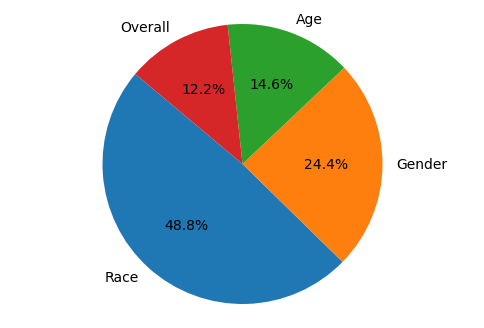

In [108]:
# # Plotting pie chart of break_out_category
# review_percent = data.Break_Out_Category.value_counts().reset_index()
# plt.figure(figsize=(6,4))
# plt.pie(review_percent['count'],labels=	Break_Out_Category, autopct='%1.1f%%', startanagle=140)
# plt.axis('equal')
# plt.show

# Plotting pie chart of break_out_category
review_percent = data.Break_Out_Category.value_counts().reset_index()
plt.figure(figsize=(6, 4))
plt.pie(review_percent['count'], labels=review_percent['Break_Out_Category'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()



Break out category is divided into Age, Gender, Race and Overall and which is again divided in to the different categories.

<Axes: xlabel='Break_Out', ylabel='count'>

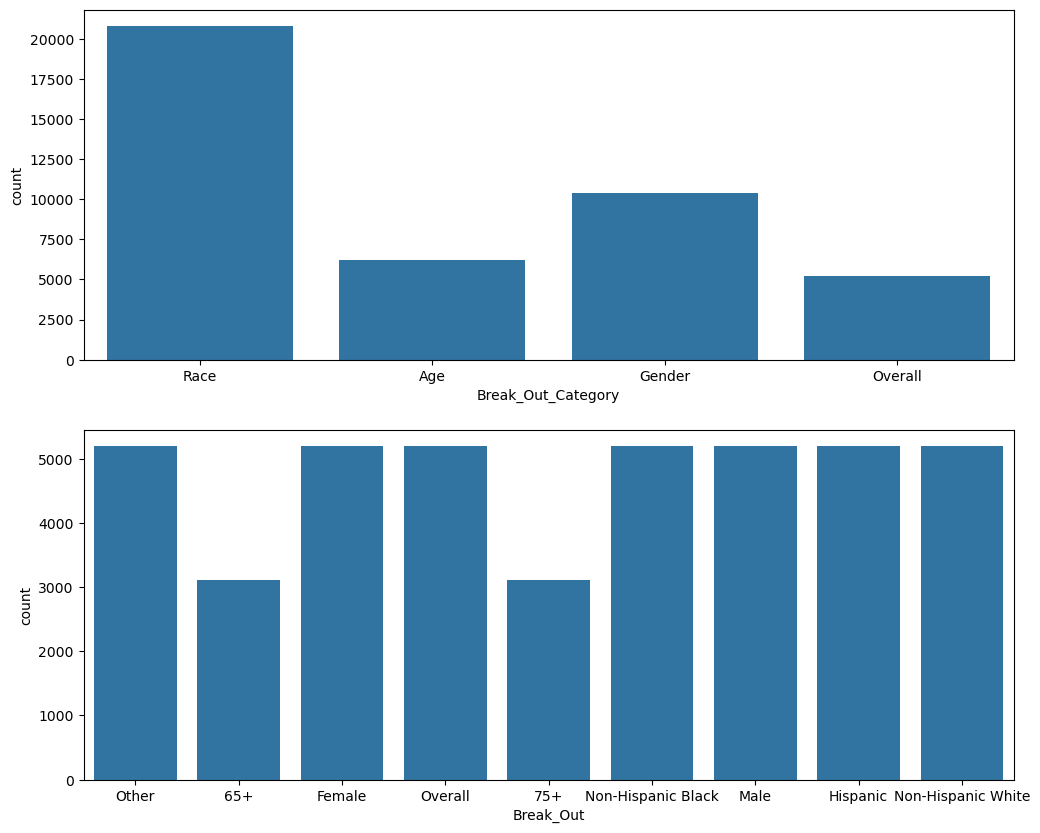

In [110]:
fig , axes=plt.subplots(nrows=2, ncols=1,figsize=(12,10))

sns.countplot(data=data, x="Break_Out_Category",ax=axes[0])
sns.countplot(data=data, x="Break_Out",ax=axes[1])

# **2.Histogram of Topic**

Text(0.5, 1.0, 'Histogram of Topic')

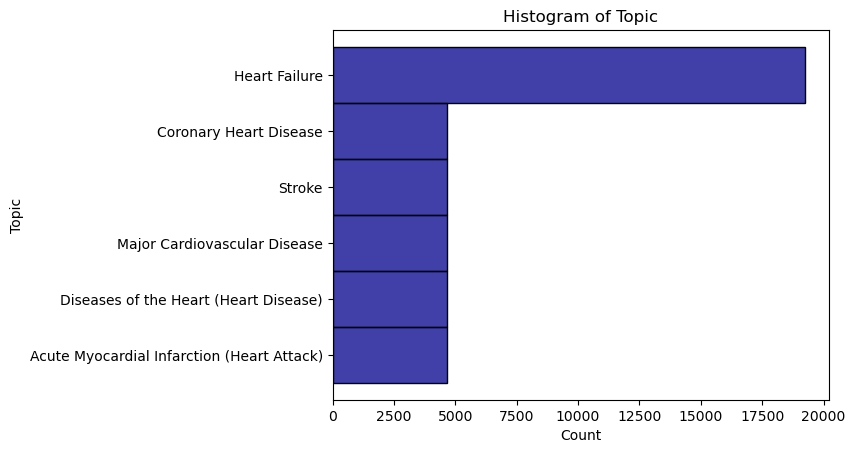

In [112]:
# Histplot of Topic to find out the count
sns.histplot(y="Topic",data=data,color="darkblue",edgecolor='black')
plt.title('Histogram of Topic')

***This graph shows the health conditions of US residents.***

# **From this graph, it is clear that Heart Failure is very high as compared to others .**

# **3.Frequency graph of dataset**

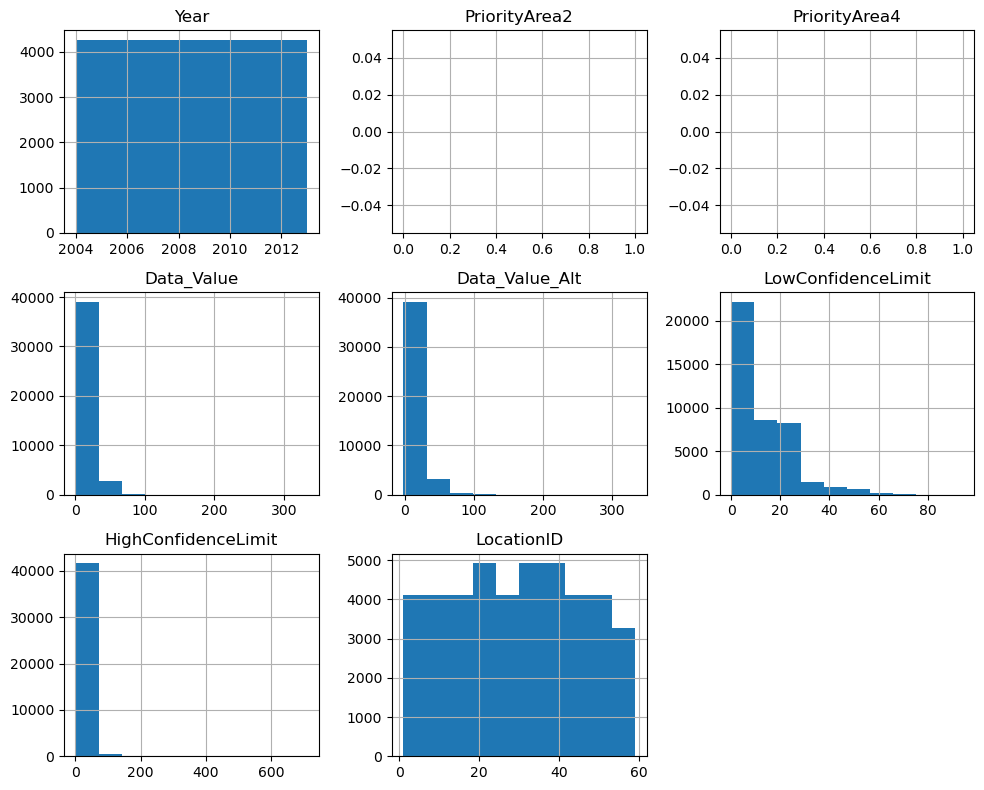

In [115]:
# Frequency graph of dataset
freqgraph=data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

**4.Plot of Priority Areas**

In [117]:
data

Year LocationAbbr   LocationDesc DataSource   PriorityArea1  \
0      2006           US  United States   Medicare             NaN   
1      2005           US  United States   Medicare             NaN   
2      2007           US  United States   Medicare             NaN   
3      2008           US  United States   Medicare             NaN   
4      2004           US  United States   Medicare             NaN   
...     ...          ...            ...        ...             ...   
42635  2012           CO       Colorado   Medicare  Million Hearts   
42636  2010           MI       Michigan   Medicare  Million Hearts   
42637  2012           ME          Maine   Medicare  Million Hearts   
42638  2013           ID          Idaho   Medicare  Million Hearts   
42639  2012           IA           Iowa   Medicare  Million Hearts   

       PriorityArea2 PriorityArea3  PriorityArea4                 Category  \
0                NaN           NaN            NaN  Cardiovascular Diseases   
1                NaN           NaN            NaN  Cardiovascular Diseases   
2                NaN           NaN            NaN  Cardiovascular Diseases   
3                NaN           NaN            NaN  Cardiovascular Diseases   
4                NaN           NaN            NaN  Cardiovascular Diseases   
...              ...           ...            ...                      ...   
42635            NaN           NaN            NaN  Cardiovascular Diseases   
42636            NaN           NaN            NaN  Cardiovascular Diseases   
42637            NaN           NaN            NaN  Cardiovascular Diseases   
42638            NaN           NaN            NaN  Cardiovascular Diseases   
42639            NaN           NaN            NaN  Cardiovascular Diseases   

                        Topic  ... Break_Out_Category           Break_Out  \
0               Heart Failure  ...               Race               Other   
1               Heart Failure  ...               Race               Other   
2      Coronary Heart Disease  ...                Age                 65+   
3      Coronary Heart Disease  ...             Gender              Female   
4               Heart Failure  ...            Overall             Overall   
...                       ...  ...                ...                 ...   
42635                  Stroke  ...             Gender                Male   
42636                  Stroke  ...             Gender              Female   
42637                  Stroke  ...               Race            Hispanic   
42638                  Stroke  ...               Race  Non-Hispanic White   
42639                  Stroke  ...             Gender                Male   

      CategoryId  TopicId  IndicatorID Data_Value_TypeID BreakOutCategoryId  \
0             C1       T5        MD501             Crude              BOC04   
1             C1       T5        MD501             Crude              BOC04   
2             C1       T4        MD301             Crude              BOC03   
3             C1       T4        MD301             Crude              BOC02   
4             C1       T5        MD501             Crude              BOC01   
...          ...      ...          ...               ...                ...   
42635         C1       T6        MD601             Crude              BOC02   
42636         C1       T6        MD601             Crude              BOC02   
42637         C1       T6        MD601             Crude              BOC04   
42638         C1       T6        MD601             Crude              BOC04   
42639         C1       T6        MD601             Crude              BOC02   

       BreakOutId  LocationID                                GeoLocation  
0           RAC07          59                                        NaN  
1           RAC07          59                                        NaN  
2           AGE06          59                                        NaN  
3           GEN02          59                          

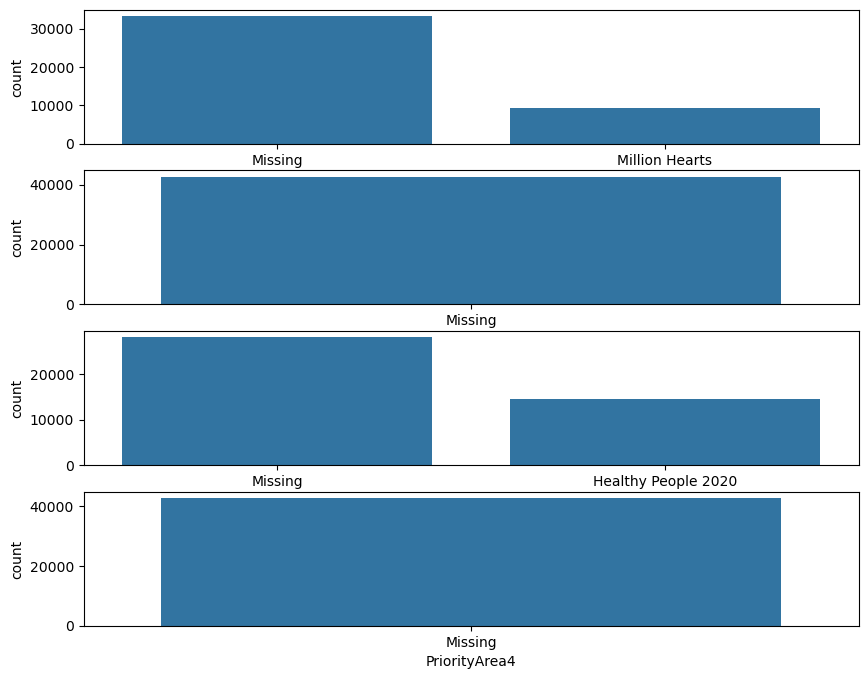

In [118]:
#PriorityAreas
fig , axes=plt.subplots(nrows=4 , ncols=1,figsize=(10,8))

data['PriorityArea1'].fillna('Missing', inplace=True)
data['PriorityArea2'].fillna('Missing', inplace=True)
data['PriorityArea3'].fillna('Missing', inplace=True)
data['PriorityArea4'].fillna('Missing', inplace=True)

sns.countplot(data=data, x="PriorityArea1",ax=axes[0])
sns.countplot(data=data, x="PriorityArea2",ax=axes[1])
sns.countplot(data=data, x="PriorityArea3",ax=axes[2])
sns.countplot(data=data, x="PriorityArea4",ax=axes[3])
plt.show()

**PriorityArea2,PriorityArea4 contains None values throughout, also these variables dont serve any purpose in prediction of our target variable.Let us drop those variables.**

# **5.Plot of DataSource,Category and Data value type**

<Axes: xlabel='Data_Value_Type', ylabel='count'>

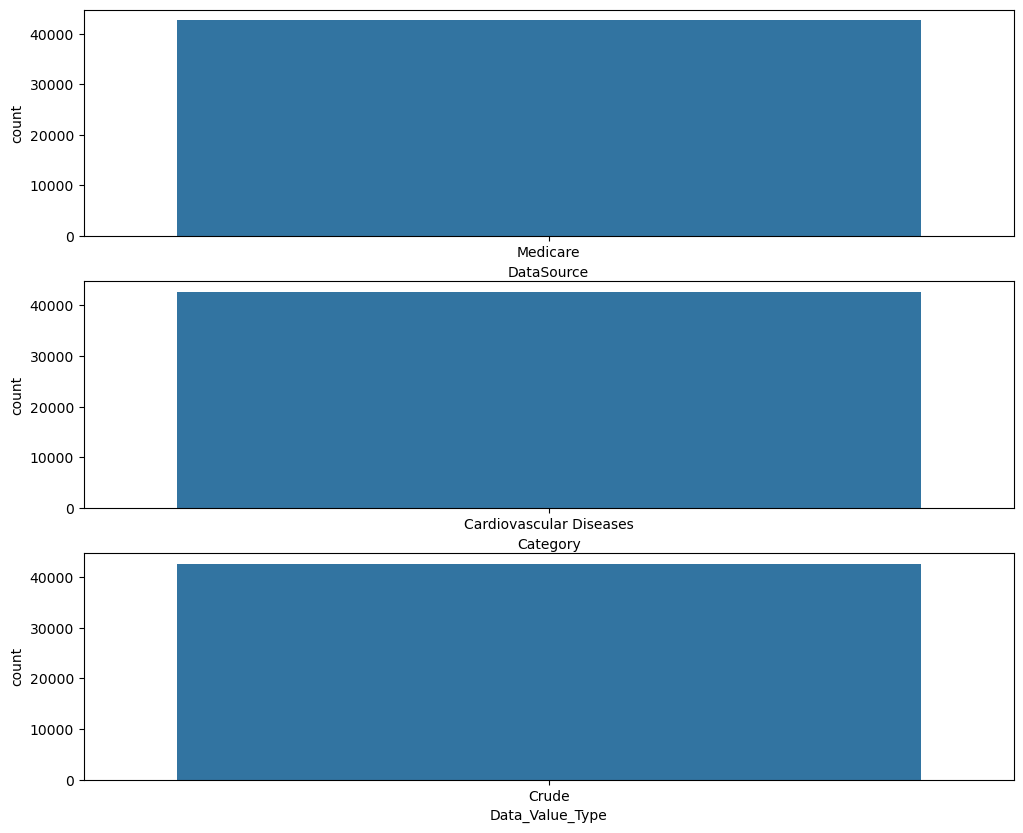

In [121]:
fig , axes=plt.subplots(nrows=3, ncols=1,figsize=(12,10))
sns.countplot(data=data, x="DataSource",ax=axes[0])
sns.countplot(data=data, x="Category",ax=axes[1])
sns.countplot(data=data, x="Data_Value_Type",ax=axes[2])

**Data source have medicare values throughout also category column consists of cardiovascular diseases values entirely.**

**This is not a variable feature in our dataset ,it is observed that it is constant throughout. Hence dropping them wil not affect our prediction.**

# **Multivariate Analysis**

# **1.Correlation Heatmap**

In [125]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Exclude non-numeric columns when computing the correlation matrix
correlation_matrix = data.drop(columns=non_numeric_columns).corr()

correlation_matrix

Year  Data_Value  Data_Value_Alt  \
Year                 1.000000e+00   -0.077007       -0.075248   
Data_Value          -7.700690e-02    1.000000        1.000000   
Data_Value_Alt      -7.524775e-02    1.000000        1.000000   
LowConfidenceLimit  -7.266295e-02    0.887767        0.887767   
HighConfidenceLimit -6.839893e-02    0.932128        0.932128   
LocationID           3.245610e-15    0.008903        0.002932   

                     LowConfidenceLimit  HighConfidenceLimit    LocationID  
Year                          -0.072663            -0.068399  3.245610e-15  
Data_Value                     0.887767             0.932128  8.903116e-03  
Data_Value_Alt                 0.887767             0.932128  2.931967e-03  
LowConfidenceLimit             1.000000             0.666933  5.041639e-03  
HighConfidenceLimit            0.666933             1.000000  1.190213e-02  
LocationID                     0.005042             0.011902  1.000000e+00

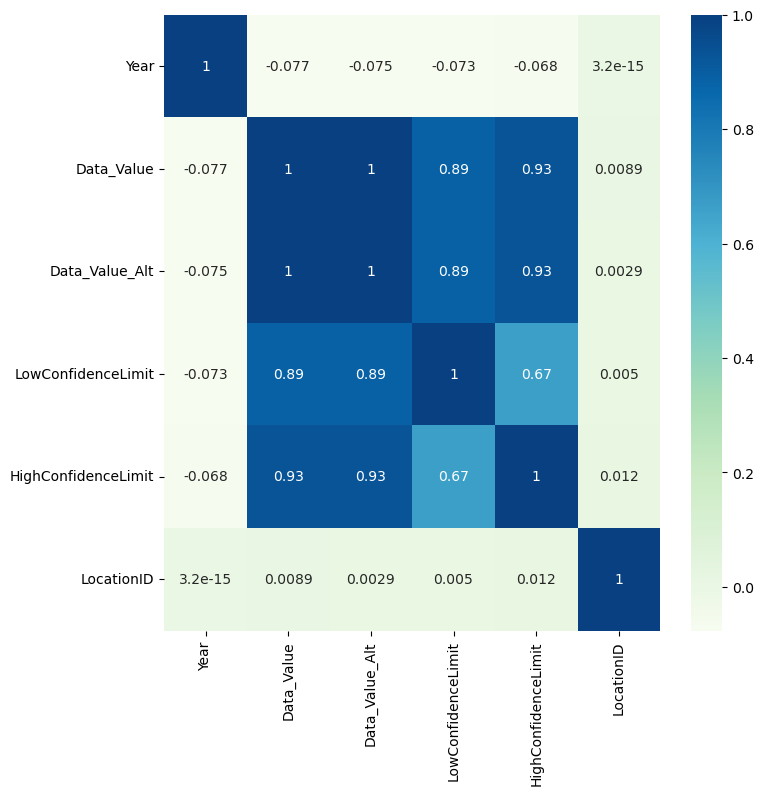

In [126]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix,annot=True,cmap='GnBu')
plt.show()

**From above correlation it is clear that Data_value and Data_Value_Alt are similar.** 

**Also high correlation is seen between Data_value,HighConfidenceLimit and LowConfidenceLimit**

# **2. Pairplot**

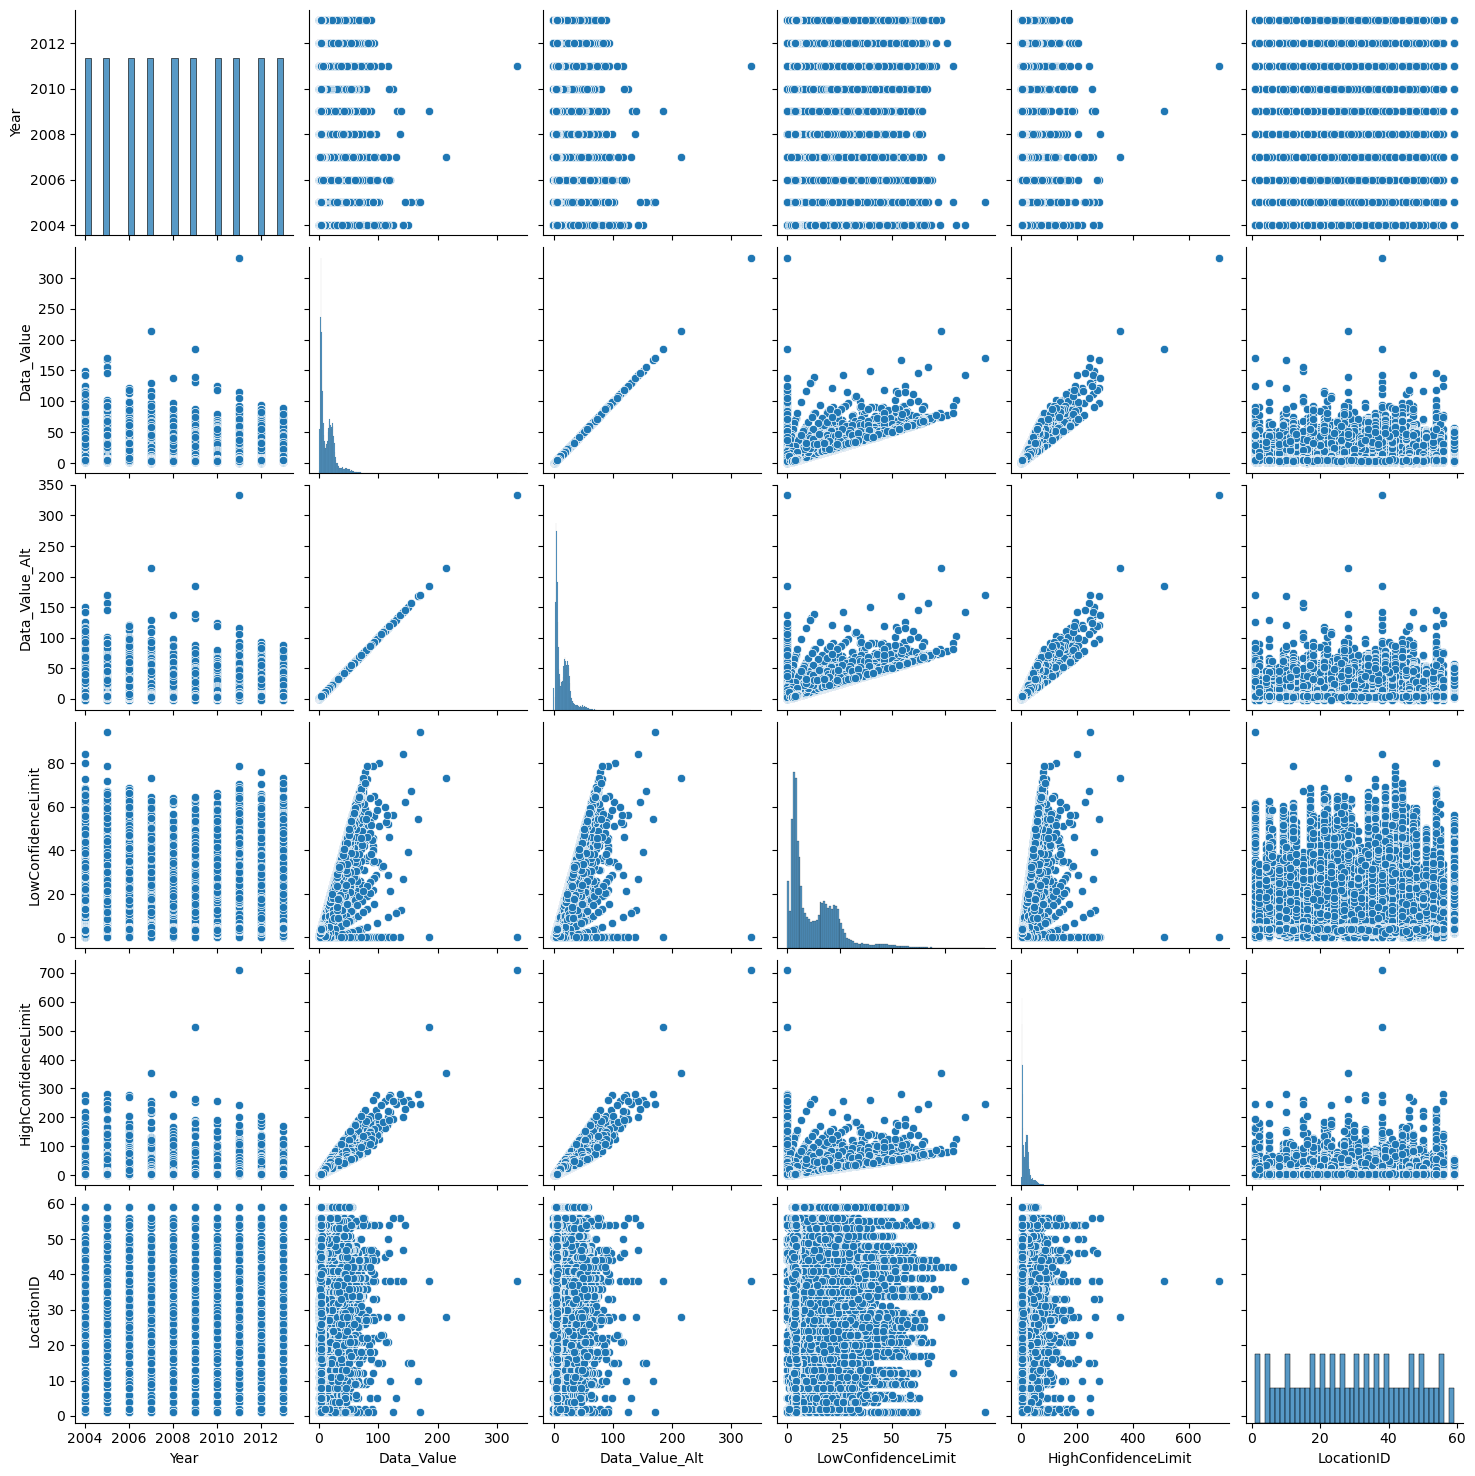

In [129]:
sns.pairplot(data)

# **Data Cleaning**

# **1. Missing values**

In [132]:
# Checking Duplicate Values
print(len(data[data.duplicated()]))

0


In [133]:
#Checking for null values
data.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                      529
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit              529
HighConfidenceLimit             529
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

<Axes: >

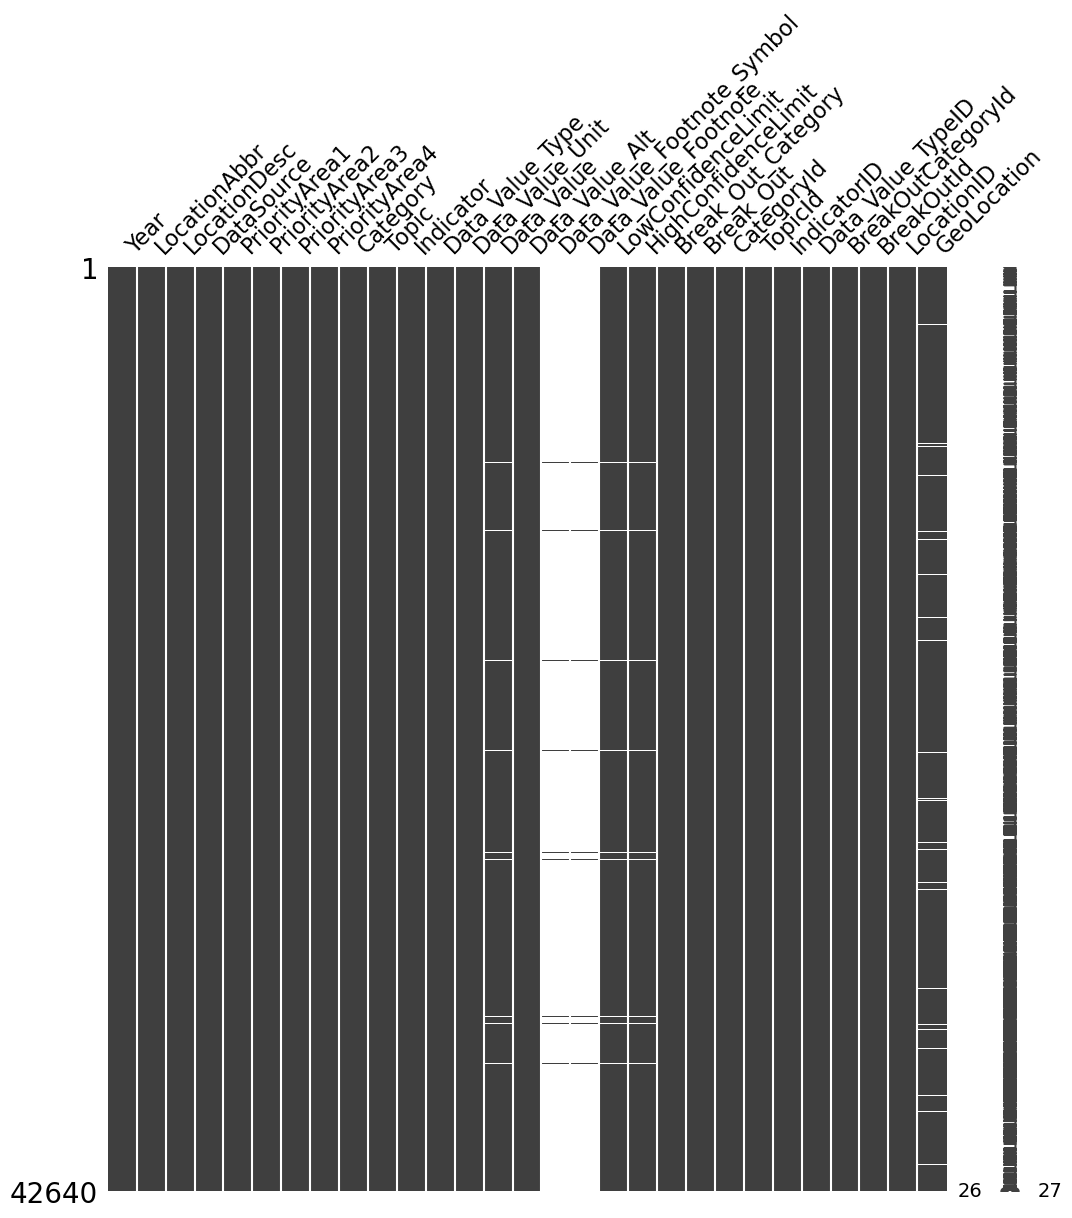

In [134]:
#Missing Values
# Install the missingno library
!pip install missingno

# Import the missingno library
import missingno as msno

# Visualize missing values
msno.matrix(data, figsize=(12, 12))

There are total 86629 missing values in the given dataset.

From this, 529 Missing values are in Datavalue variabe.

42111 missing values each for Data value foot note symbol and Datavalue foot note. This can affect the performance of our model.

529 missing values each for confidence limit low and confidence limit high respectvely.

820 missing values for Geolocation.

In [164]:
#Columns: Data_Value_Footnote_Symbol,Data_Value_Footnote consists tremendous number of missing values and are not required for prediction.
#It is adviseable to drop them.Also GeoLocation is to be dropped as it is unnecessary for prediction
#Dropping Data_Value
data.drop('Data_Value_Footnote_Symbol', axis = 1,inplace=True)
data.drop('Data_Value_Footnote', axis = 1,inplace=True)
data.drop('GeoLocation', axis = 1,inplace=True)
data.drop('Data_Value', axis = 1,inplace=True)

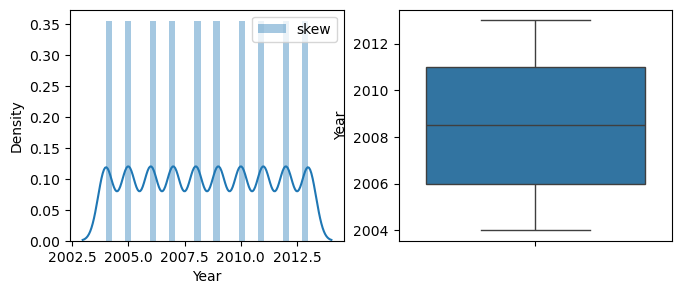

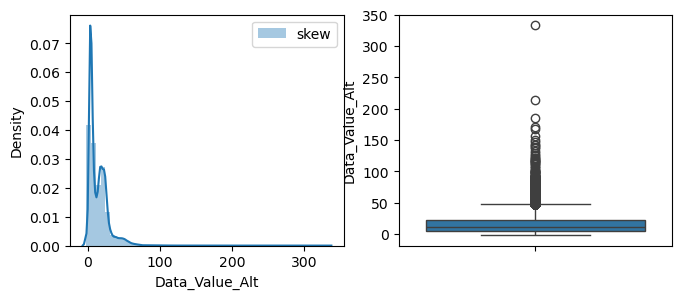

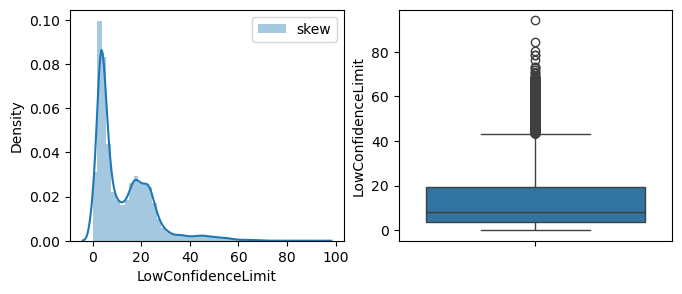

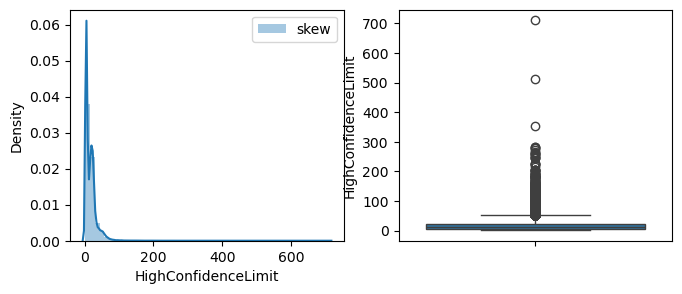

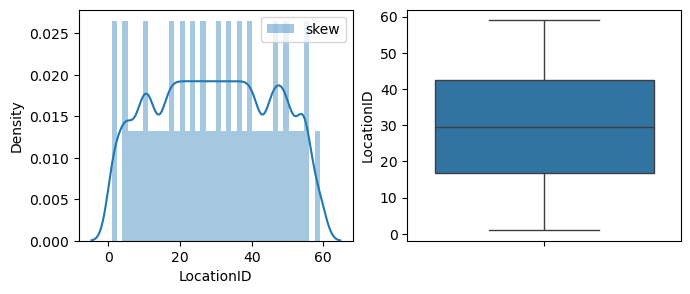

In [166]:
from scipy import stats

for col in data.describe().columns:
  plt.figure(figsize=(12,3))

# Skewness Distribution
  plt.subplot(131)
  sns.distplot(data[col], label="skew" )
  plt.legend()

# Boxplot - For outliers detection
  plt.subplot(132)
  sns.boxplot(data[col])
  plt.show()

From above plot it can be observed that, year and LocationID is free from outliers where rest of the numeric features poses outliers.

Also these features are right skewed. Let us see the number of null values present in them.

In [168]:
# Filling the missing values using median(Right skewed data)

filler = data["HighConfidenceLimit"].median()
data["HighConfidenceLimit"] = data["HighConfidenceLimit"].fillna(filler)

filler = data["LowConfidenceLimit"].median()
data["LowConfidenceLimit"] = data["LowConfidenceLimit"].fillna(filler)

In [170]:
# Recheck for null values after Filling and Dropping
data.isna().sum()

Year                   0
LocationAbbr           0
LocationDesc           0
DataSource             0
PriorityArea1          0
PriorityArea2          0
PriorityArea3          0
PriorityArea4          0
Category               0
Topic                  0
Indicator              0
Data_Value_Type        0
Data_Value_Unit        0
Data_Value_Alt         0
LowConfidenceLimit     0
HighConfidenceLimit    0
Break_Out_Category     0
Break_Out              0
CategoryId             0
TopicId                0
IndicatorID            0
Data_Value_TypeID      0
BreakOutCategoryId     0
BreakOutId             0
LocationID             0
dtype: int64

**2.Removing Outliers**

In [172]:
# Removing outliers using interquantile range
#Defining function as we have to remove outliers from multiple columns

def outliers(data,ft):
  Q1 = data[ft].quantile(0.25)
  Q3= data[ft].quantile(0.75)
  IQR =Q3 - Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

#List to store the index values of the outliers
  ol_list = data.index[(data[ft]<lower_bound) | (data[ft]>upper_bound)]
  return ol_list

In [174]:
#Create an empty list to store the output indices from multiple columns
index_list=[]
for feature in ['Data_Value_Alt','LowConfidenceLimit','HighConfidenceLimit']:
  index_list.extend(outliers(data,feature))

In [176]:
print(index_list)

[1161, 6187, 23240, 23728, 24260, 24361, 24636, 26006, 26334, 26408, 26733, 26896, 27909, 28415, 29980, 30349, 30984, 31043, 31105, 31131, 31446, 31461, 31465, 31616, 31750, 31764, 31800, 31819, 31822, 32033, 32112, 32134, 32180, 32188, 32490, 32509, 32511, 32522, 32523, 32524, 32530, 32541, 32604, 32607, 32625, 32630, 32677, 32690, 32717, 32735, 32741, 32752, 32785, 32786, 32826, 32838, 32856, 32870, 32875, 32882, 32897, 32914, 32921, 32942, 32952, 32961, 33051, 33070, 33071, 33073, 33095, 33123, 33125, 33148, 33153, 33171, 33181, 33193, 33259, 33272, 33300, 33308, 33309, 33344, 33364, 33386, 33414, 33417, 33431, 33447, 33476, 33511, 33577, 33592, 33610, 33626, 33642, 33698, 33704, 33707, 33734, 33792, 33799, 33846, 33883, 33923, 33936, 33938, 34000, 34005, 34006, 34025, 34057, 34088, 34090, 34115, 34129, 34141, 34160, 34212, 34227, 34241, 34265, 34329, 34353, 34391, 34408, 34432, 34438, 34475, 34478, 34480, 34482, 34490, 34491, 34493, 34494, 34496, 34499, 34503, 34504, 34506, 34509, 

In [178]:
#Defining remove function to get cleaned dataframe without outliers
def remove(data,ol_list):
  ol_list=sorted(set(ol_list))                          #To get the sorted list
  data=data.drop(ol_list)
  return data

In [180]:
#Storing the cleaned data into new data frame named df1
data1=remove(data,index_list)

In [182]:
#New shape of cleaned data
data1.shape

(40505, 25)

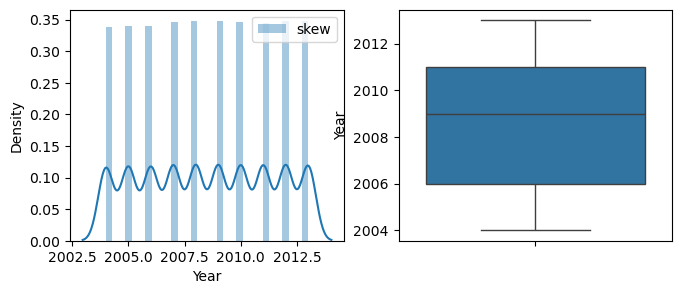

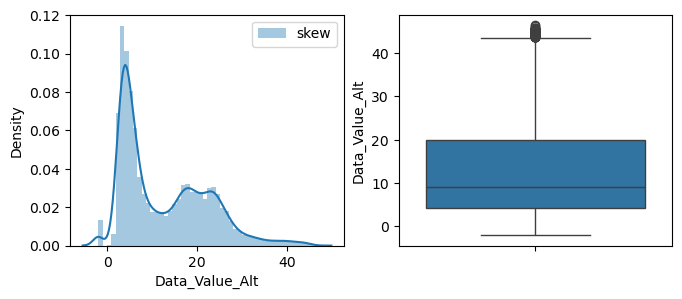

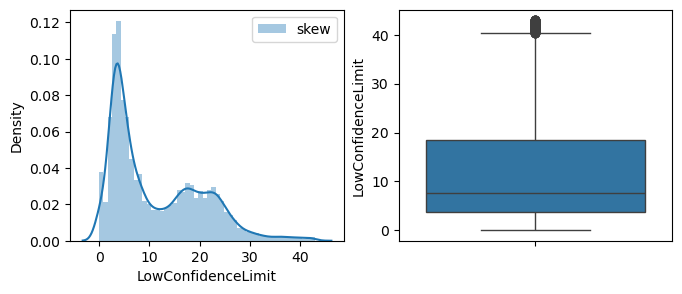

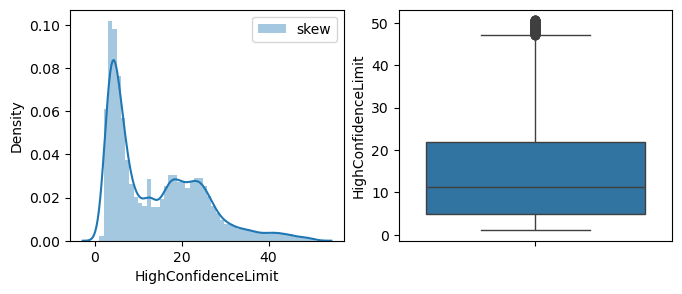

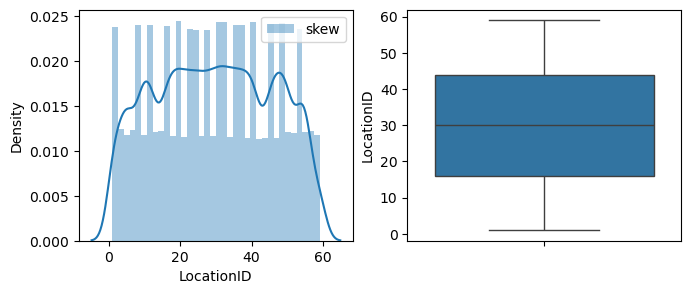

In [184]:
#Lets verify the removal of outliers graphically
#Visualization

from scipy import stats
for col in data1.describe().columns:
  plt.figure(figsize=(12,3))

# Skewness Distribution
  plt.subplot(131)
  sns.distplot(data1[col], label="skew" )
  plt.legend()

# Boxplot - For outliers detection
  plt.subplot(132)
  sns.boxplot(data1[col])
  plt.show()

# **Cleaning of categorical features**

In [186]:
compare_location = pd.DataFrame({'LocationAbbr': data1.LocationAbbr, 'LocationDesc': data1.LocationDesc})
compare_location.value_counts()

LocationAbbr  LocationDesc  
AZ            Arizona           813
UT            Utah              812
CO            Colorado          810
NM            New Mexico        810
OR            Oregon            808
WA            Washington        805
DC            Washington, DC    805
NV            Nevada            804
CA            California        803
AK            Alaska            801
KS            Kansas            800
IA            Iowa              799
ID            Idaho             797
NE            Nebraska          796
MT            Montana           796
HI            Hawaii            796
WY            Wyoming           795
WI            Wisconsin         792
VT            Vermont           792
GA            Georgia           789
SD            South Dakota      789
NC            North Carolina    789
NH            New Hampshire     787
ME            Maine             786
VA            Virginia          786
SC            South Carolina    786
MD            Maryland          782

From above we can observe that LocationAbbr is the abbrevation of LocationDesc.

We can drop these columns as they are unnecessary for prediction.

In [188]:
compare_topic = pd.DataFrame({'Topic': data1.Topic,'TopicId': data1.TopicId})
                             
compare_topic.value_counts()

Topic                                       TopicId
Heart Failure                               T5         17126
Stroke                                      T6          4680
Acute Myocardial Infarction (Heart Attack)  T3          4679
Coronary Heart Disease                      T4          4679
Diseases of the Heart (Heart Disease)       T2          4674
Major Cardiovascular Disease                T1          4667
Name: count, dtype: int64

In [189]:
compare_breakout = pd.DataFrame({'Break_Out': data1.Break_Out,
                             'BreakOutId': data1.BreakOutId})
compare_breakout.value_counts()

Break_Out           BreakOutId
Female              GEN02         5031
Non-Hispanic White  RAC01         4983
Overall             OVR01         4977
Male                GEN01         4905
Other               RAC07         4889
Hispanic            RAC04         4747
Non-Hispanic Black  RAC02         4733
65+                 AGE06         3120
75+                 AGE08         3120
Name: count, dtype: int64

In [190]:
compare_breakout_cat = pd.DataFrame({'Break_Out_Category': data1.Break_Out_Category,
                           'BreakOutCategoryId': data1.BreakOutCategoryId})
compare_breakout_cat.value_counts()

Break_Out_Category  BreakOutCategoryId
Race                BOC04                 19352
Gender              BOC02                  9936
Age                 BOC03                  6240
Overall             BOC01                  4977
Name: count, dtype: int64

In [191]:
compare_area = pd.DataFrame({'PriorityArea1': data1.PriorityArea1,
                           'PriorityArea3': data1.PriorityArea3,
                           'Data_Value_Unit': data1.Data_Value_Unit})
compare_area.value_counts()

PriorityArea1   PriorityArea3        Data_Value_Unit
Missing         Missing              Percent (%)        18699
                Healthy People 2020  Rate per 1,000     12447
Million Hearts  Missing              Percent (%)         9359
Name: count, dtype: int64

In [192]:
#Dropping unwanted columns
b=['PriorityArea2', 'PriorityArea4','DataSource','Category','Data_Value_Type','LocationAbbr','LocationDesc','TopicId','BreakOutId','BreakOutCategoryId','CategoryId','LocationID','Data_Value_TypeID','IndicatorID']
for i in np.arange(len(b)):
    data1.drop(b[i], axis=1,inplace=True)

In [193]:
data1.columns

Index(['Year', 'PriorityArea1', 'PriorityArea3', 'Topic', 'Indicator',
       'Data_Value_Unit', 'Data_Value_Alt', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'Break_Out_Category', 'Break_Out'],
      dtype='object')

In [194]:
data1.shape

(40505, 11)

# **Feature Engineering for Priority Area variables**

In [196]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
#creating an instance LabelEncoder
label_en =LabelEncoder()

In [197]:
#Create dummies for PriorityArea1
p1=pd.get_dummies(data1['PriorityArea1'])

#Create dummies for PriorityArea3
p3=pd.get_dummies(data1['PriorityArea3'])

#Concatenating PriorityAreas
data1=pd.concat([data1,p1,p3],axis=1)

In [198]:
data1

Year   PriorityArea1 PriorityArea3                   Topic  \
0      2006         Missing       Missing           Heart Failure   
1      2005         Missing       Missing           Heart Failure   
2      2007         Missing       Missing  Coronary Heart Disease   
3      2008         Missing       Missing  Coronary Heart Disease   
4      2004         Missing       Missing           Heart Failure   
...     ...             ...           ...                     ...   
42635  2012  Million Hearts       Missing                  Stroke   
42636  2010  Million Hearts       Missing                  Stroke   
42637  2012  Million Hearts       Missing                  Stroke   
42638  2013  Million Hearts       Missing                  Stroke   
42639  2012  Million Hearts       Missing                  Stroke   

                                               Indicator Data_Value_Unit  \
0      Prevalence of heart failure hospitalizations a...     Percent (%)   
1      Prevalence of heart failure hospitalizations a...     Percent (%)   
2      Prevalence of coronary heart disease hospitali...     Percent (%)   
3      Prevalence of coronary heart disease hospitali...     Percent (%)   
4      Prevalence of heart failure hospitalizations a...     Percent (%)   
...                                                  ...             ...   
42635  Prevalence of cerebrovascular disease hospital...     Percent (%)   
42636  Prevalence of cerebrovascular disease hospital...     Percent (%)   
42637  Prevalence of cerebrovascular disease hospital...     Percent (%)   
42638  Prevalence of cerebrovascular disease hospital...     Percent (%)   
42639  Prevalence of cerebrovascular disease hospital...     Percent (%)   

       Data_Value_Alt  LowConfidenceLimit  HighConfidenceLimit  \
0                 5.2                 5.1                  5.3   
1                 5.1                 5.1                  5.2   
2                 8.5                 8.4                  8.5   
3                 5.1                 5.1                  5.1   
4                 6.1                 6.1                  6.1   
...               ...                 ...                  ...   
42635             3.7                 3.6                  3.9   
42636             3.4                 3.3                  3.5   
42637            -2.0                 8.2                 12.7   
42638             4.5                 4.3                  4.7   
42639             4.0                 3.8                  4.2   

      Break_Out_Category           Break_Out  Million Hearts  Missing  \
0                   Race               Other           False     True   
1                   Race               Other           False     True   
2                    Age                 65+           False     True   
3                 Gender              Female           False     True   
4                Overall             Overall           False     True   
...                  ...                 ...             ...      ...   
42635             Gender                Male            True    False   
42636             Gender              Female            True    False   
42637               Race            Hispanic            True    False   
42638               Race  Non-Hispanic White            True    False   
42639             Gender                Male            True    False   

       Healthy People 2020  Missing  
0                    False     True  
1                    False     True  
2                    False     True  
3                    False     True  
4                    False     True  
...                    ...      ...  
42635                False     True  
42636                False     True  
42637                False     True  
42638                False     True  
42639                False     True  

[40505 rows x 15 columns]

In [199]:
print(data1.dtypes)

Year                     int64
PriorityArea1           object
PriorityArea3           object
Topic                   object
Indicator               object
Data_Value_Unit         object
Data_Value_Alt         float64
LowConfidenceLimit     float64
HighConfidenceLimit    float64
Break_Out_Category      object
Break_Out               object
Million Hearts            bool
Missing                   bool
Healthy People 2020       bool
Missing                   bool
dtype: object


In [200]:
data1["Million Hearts"]=data1["Million Hearts"]*data1["PriorityArea1"]
data1["Healthy People 2020"]=data1["Healthy People 2020"]*data1["PriorityArea3"]

In [201]:
data1.head()

Year PriorityArea1 PriorityArea3                   Topic  \
0  2006       Missing       Missing           Heart Failure   
1  2005       Missing       Missing           Heart Failure   
2  2007       Missing       Missing  Coronary Heart Disease   
3  2008       Missing       Missing  Coronary Heart Disease   
4  2004       Missing       Missing           Heart Failure   

                                           Indicator Data_Value_Unit  \
0  Prevalence of heart failure hospitalizations a...     Percent (%)   
1  Prevalence of heart failure hospitalizations a...     Percent (%)   
2  Prevalence of coronary heart disease hospitali...     Percent (%)   
3  Prevalence of coronary heart disease hospitali...     Percent (%)   
4  Prevalence of heart failure hospitalizations a...     Percent (%)   

   Data_Value_Alt  LowConfidenceLimit  HighConfidenceLimit Break_Out_Category  \
0             5.2                 5.1                  5.3               Race   
1             5.1                 5.1                  5.2               Race   
2             8.5                 8.4                  8.5                Age   
3             5.1                 5.1                  5.1             Gender   
4             6.1                 6.1                  6.1            Overall   

  Break_Out Million Hearts  Missing Healthy People 2020  Missing  
0     Other                    True                         True  
1     Other                    True                         True  
2       65+                    True                         True  
3    Female                    True                         True  
4   Overall                    True                         True

In [202]:
#create new column "PriorityArea"
data1["PriorityArea"]=data1["Million Hearts"]+data1["Healthy People 2020"]

In [203]:
data1

Year   PriorityArea1 PriorityArea3                   Topic  \
0      2006         Missing       Missing           Heart Failure   
1      2005         Missing       Missing           Heart Failure   
2      2007         Missing       Missing  Coronary Heart Disease   
3      2008         Missing       Missing  Coronary Heart Disease   
4      2004         Missing       Missing           Heart Failure   
...     ...             ...           ...                     ...   
42635  2012  Million Hearts       Missing                  Stroke   
42636  2010  Million Hearts       Missing                  Stroke   
42637  2012  Million Hearts       Missing                  Stroke   
42638  2013  Million Hearts       Missing                  Stroke   
42639  2012  Million Hearts       Missing                  Stroke   

                                               Indicator Data_Value_Unit  \
0      Prevalence of heart failure hospitalizations a...     Percent (%)   
1      Prevalence of heart failure hospitalizations a...     Percent (%)   
2      Prevalence of coronary heart disease hospitali...     Percent (%)   
3      Prevalence of coronary heart disease hospitali...     Percent (%)   
4      Prevalence of heart failure hospitalizations a...     Percent (%)   
...                                                  ...             ...   
42635  Prevalence of cerebrovascular disease hospital...     Percent (%)   
42636  Prevalence of cerebrovascular disease hospital...     Percent (%)   
42637  Prevalence of cerebrovascular disease hospital...     Percent (%)   
42638  Prevalence of cerebrovascular disease hospital...     Percent (%)   
42639  Prevalence of cerebrovascular disease hospital...     Percent (%)   

       Data_Value_Alt  LowConfidenceLimit  HighConfidenceLimit  \
0                 5.2                 5.1                  5.3   
1                 5.1                 5.1                  5.2   
2                 8.5                 8.4                  8.5   
3                 5.1                 5.1                  5.1   
4                 6.1                 6.1                  6.1   
...               ...                 ...                  ...   
42635             3.7                 3.6                  3.9   
42636             3.4                 3.3                  3.5   
42637            -2.0                 8.2                 12.7   
42638             4.5                 4.3                  4.7   
42639             4.0                 3.8                  4.2   

      Break_Out_Category           Break_Out  Million Hearts  Missing  \
0                   Race               Other                     True   
1                   Race               Other                     True   
2                    Age                 65+                     True   
3                 Gender              Female                     True   
4                Overall             Overall                     True   
...                  ...                 ...             ...      ...   
42635             Gender                Male  Million Hearts    False   
42636             Gender              Female  Million Hearts    False   
42637               Race            Hispanic  Million Hearts    False   
42638               Race  Non-Hispanic White  Million Hearts    False   
42639             Gender                Male  Million Hearts    False   

      Healthy People 2020  Missing    PriorityArea  
0                             True                  
1                             True                  
2                             True                  
3                             True                  
4                             True                  
...                   ...      ...             ...  
42635                         True  Million Hearts  
42636                         True  Million Hearts  
42637                         True  Million Hearts  
42638                         True  Million Hearts  
42639       

In [204]:
#removing unwanted columns
# data1=data1.drop(['None'],axis=1)

In [205]:
#removing unwanted columns
data1=data1.drop(["Million Hearts","Healthy People 2020","PriorityArea1","PriorityArea3"],axis=1)

In [206]:
#value counts of newcolumn
data1["PriorityArea"].value_counts()

PriorityArea
                       18699
Healthy People 2020    12447
Million Hearts          9359
Name: count, dtype: int64

In [207]:
#label encoding new PriorityArea
data1["PriorityArea"]=label_en.fit_transform(data1["PriorityArea"])

In [208]:
#value counts of newcolumn
data1["PriorityArea"].value_counts()

PriorityArea
0    18699
1    12447
2     9359
Name: count, dtype: int64

In [209]:
data1.head()

Year                   Topic  \
0  2006           Heart Failure   
1  2005           Heart Failure   
2  2007  Coronary Heart Disease   
3  2008  Coronary Heart Disease   
4  2004           Heart Failure   

                                           Indicator Data_Value_Unit  \
0  Prevalence of heart failure hospitalizations a...     Percent (%)   
1  Prevalence of heart failure hospitalizations a...     Percent (%)   
2  Prevalence of coronary heart disease hospitali...     Percent (%)   
3  Prevalence of coronary heart disease hospitali...     Percent (%)   
4  Prevalence of heart failure hospitalizations a...     Percent (%)   

   Data_Value_Alt  LowConfidenceLimit  HighConfidenceLimit Break_Out_Category  \
0             5.2                 5.1                  5.3               Race   
1             5.1                 5.1                  5.2               Race   
2             8.5                 8.4                  8.5                Age   
3             5.1                 5.1                  5.1             Gender   
4             6.1                 6.1                  6.1            Overall   

  Break_Out  Missing  Missing  PriorityArea  
0     Other     True     True             0  
1     Other     True     True             0  
2       65+     True     True             0  
3    Female     True     True             0  
4   Overall     True     True             0

In [210]:
data1.shape

(40505, 12)

In [211]:
data1.columns

Index(['Year', 'Topic', 'Indicator', 'Data_Value_Unit', 'Data_Value_Alt',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'Break_Out_Category',
       'Break_Out', 'Missing', 'Missing', 'PriorityArea'],
      dtype='object')

In [212]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40505 entries, 0 to 42639
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 40505 non-null  int64  
 1   Topic                40505 non-null  object 
 2   Indicator            40505 non-null  object 
 3   Data_Value_Unit      40505 non-null  object 
 4   Data_Value_Alt       40505 non-null  float64
 5   LowConfidenceLimit   40505 non-null  float64
 6   HighConfidenceLimit  40505 non-null  float64
 7   Break_Out_Category   40505 non-null  object 
 8   Break_Out            40505 non-null  object 
 9   Missing              40505 non-null  bool   
 10  Missing              40505 non-null  bool   
 11  PriorityArea         40505 non-null  int32  
dtypes: bool(2), float64(3), int32(1), int64(1), object(5)
memory usage: 3.3+ MB


**Label Encoding**

In [214]:
data1['Topic']=label_en.fit_transform(data1['Topic'])
data1['Indicator']=label_en.fit_transform(data1['Indicator'])
data1['Data_Value_Unit']=label_en.fit_transform(data1['Data_Value_Unit'])
data1['Break_Out_Category']=label_en.fit_transform(data1['Break_Out_Category'])
data1['Break_Out']=label_en.fit_transform(data1['Break_Out'])

In [215]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40505 entries, 0 to 42639
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 40505 non-null  int64  
 1   Topic                40505 non-null  int32  
 2   Indicator            40505 non-null  int32  
 3   Data_Value_Unit      40505 non-null  int32  
 4   Data_Value_Alt       40505 non-null  float64
 5   LowConfidenceLimit   40505 non-null  float64
 6   HighConfidenceLimit  40505 non-null  float64
 7   Break_Out_Category   40505 non-null  int32  
 8   Break_Out            40505 non-null  int32  
 9   Missing              40505 non-null  bool   
 10  Missing              40505 non-null  bool   
 11  PriorityArea         40505 non-null  int32  
dtypes: bool(2), float64(3), int32(6), int64(1)
memory usage: 2.5 MB


In [216]:
#Splitting Dataset
y=data1['Topic']
X=data1.drop('Topic',axis=1)

#**Model Building**

In [219]:
# Install the xgboost library
!pip install xgboost
#Importing necessary libraries for model buiding

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---

In [221]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.2, random_state = 100)
print("Size of training set:", X_train1.shape)
print("Size of test set:", X_test1.shape)

Size of training set: (32404, 11)
Size of test set: (8101, 11)


**1.Multinomial Logistic Regression**

In [223]:
lr1=LogisticRegression()
parameters = [{'penalty':['l1','l2','elasticNet']},{'multi_class':['multinomial']},
              {'C':[1, 10, 100, 1000]}]
grid_lr1 = GridSearchCV(estimator =lr1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_lr1.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticNet']},
                         {'multi_class': ['multinomial']},
                         {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [224]:
y_pred_train1=grid_lr1.predict(X_train1)
y_pred_test1=grid_lr1.predict(X_test1)

In [225]:
#Classification report of train data
print(classification_report(y_pred_train1,y_train1))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      3980
           1       0.71      0.79      0.75      3370
           2       1.00      0.99      0.99      3753
           3       0.92      0.88      0.90     14352
           4       0.56      0.68      0.61      3091
           5       0.92      0.88      0.90      3858

    accuracy                           0.86     32404
   macro avg       0.83      0.84      0.84     32404
weighted avg       0.87      0.86      0.86     32404



In [226]:
#Classification report of test data
print(classification_report(y_pred_test1,y_test1))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       940
           1       0.73      0.77      0.75       895
           2       0.99      0.99      0.99       952
           3       0.92      0.88      0.90      3550
           4       0.57      0.70      0.63       756
           5       0.91      0.87      0.89      1008

    accuracy                           0.86      8101
   macro avg       0.83      0.85      0.84      8101
weighted avg       0.87      0.86      0.86      8101



In [227]:
#Accuracy Score
ascore_lr_train1=accuracy_score(y_pred_train1,y_train1)
ascore_lr_train1

0.8591531909640785

In [228]:
#Accuracy Score
ascore_lr1=accuracy_score(y_pred_test1,y_test1)
ascore_lr1

0.8611282557708925

**2.Decision Tree**

In [230]:
d_tree1 = DecisionTreeClassifier()
grid_dtc1 = GridSearchCV(d_tree1, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 7)
grid_dtc1.fit(X_train1, y_train1)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy')

In [231]:
y_pred_train_dtg1 = grid_dtc1.predict(X_train1)
y_pred_test_dtg1 = grid_dtc1.predict(X_test1)

In [232]:
#Classification report for train data
print(classification_report(y_train1,y_pred_train_dtg1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3760
           1       1.00      1.00      1.00      3732
           2       1.00      1.00      1.00      3724
           3       1.00      1.00      1.00     13732
           4       1.00      1.00      1.00      3743
           5       1.00      1.00      1.00      3713

    accuracy                           1.00     32404
   macro avg       1.00      1.00      1.00     32404
weighted avg       1.00      1.00      1.00     32404



In [233]:
#Classification report for test data
print(classification_report(y_test1,y_pred_test_dtg1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       919
           1       1.00      1.00      1.00       947
           2       1.00      1.00      1.00       950
           3       1.00      1.00      1.00      3394
           4       1.00      1.00      1.00       924
           5       1.00      1.00      1.00       967

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



In [234]:
#Accuracy Score
ascore_dtg_train1=accuracy_score(y_pred_test_dtg1,y_test1)
ascore_dtg_train1

1.0

In [235]:
#Accuracy Score
ascore_dtg1=accuracy_score(y_pred_test_dtg1,y_test1)
ascore_dtg1

1.0

**3.KNN**

In [237]:
knn1 = KNeighborsClassifier()
k_range = list(range(1,41))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
knn_grid1 = GridSearchCV(knn1, param_grid, cv=7, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
knn_grid1.fit(X_train1, y_train1)

Fitting 7 folds for each of 40 candidates, totalling 280 fits


GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=1)

In [238]:
y_pred_train_knn1=knn_grid1.predict(X_train1)
y_pred_test_knn1=knn_grid1.predict(X_test1)

In [239]:
#Classification report for train data
print(classification_report(y_train1,y_pred_train_knn1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3760
           1       1.00      1.00      1.00      3732
           2       1.00      1.00      1.00      3724
           3       1.00      1.00      1.00     13732
           4       1.00      1.00      1.00      3743
           5       1.00      1.00      1.00      3713

    accuracy                           1.00     32404
   macro avg       1.00      1.00      1.00     32404
weighted avg       1.00      1.00      1.00     32404



In [240]:
#Classification report for test data
print(classification_report(y_test1,y_pred_test_knn1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       919
           1       0.99      0.99      0.99       947
           2       1.00      1.00      1.00       950
           3       0.99      1.00      1.00      3394
           4       1.00      0.98      0.99       924
           5       1.00      1.00      1.00       967

    accuracy                           1.00      8101
   macro avg       1.00      0.99      0.99      8101
weighted avg       1.00      1.00      1.00      8101



In [241]:
#Accuracy Score
ascore_knn_train1=accuracy_score(y_pred_train_knn1,y_train1)
ascore_knn_train1

1.0

In [242]:
#Accuracy Score
ascore_knn1=accuracy_score(y_pred_test_knn1,y_test1)
ascore_knn1

0.9950623379829651

In [243]:
model_list1 = ['Logistic regression','Decision Tree','KNN']
train_result_list1 = [ascore_lr_train1*100,ascore_dtg_train1*100,ascore_knn_train1*100]
result_list1 = [ascore_lr1*100,ascore_dtg1*100,ascore_knn1*100]

df_result1 = pd.DataFrame()
df_result1['Model name'] = model_list1
df_result1['Accuracy Score (Train)'] = train_result_list1
df_result1['Accuracy Score(Test)'] = result_list1

df_result1

Model name  Accuracy Score (Train)  Accuracy Score(Test)
0  Logistic regression               85.915319             86.112826
1        Decision Tree              100.000000            100.000000
2                  KNN              100.000000             99.506234

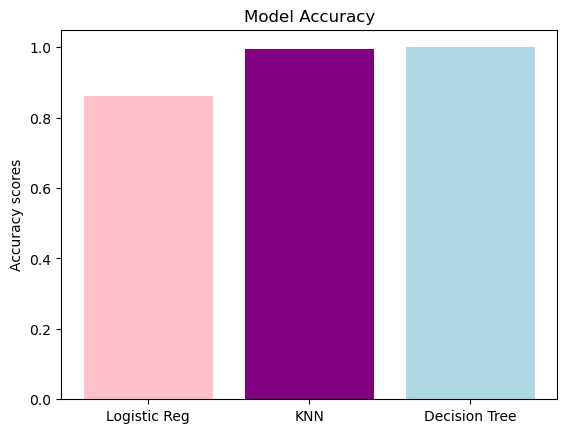

In [244]:
#Bar graph of accuracy score of models perfromed
models = ['Logistic Reg', 'KNN','Decision Tree']
acc_scores=[ascore_lr1,ascore_knn1,ascore_dtg1]
plt.bar(models, acc_scores, color=['pink', 'purple', 'lightblue'])
plt.ylabel("Accuracy scores")
plt.title("Model Accuracy")
plt.show()

# **Verification**


**Topic :**

0:Major Cardiovascular Disease                     

1:Stroke                                           

2:Diseases of the Heart (Heart Disease)            

3:Heart Failure                                    

4:Acute Myocardial Infarction (Heart Attack)       

5:Coronary Heart Disease                           


**Indicator :**

0 : Prevalence of all heart disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)

1 : Prevalence of heart failure hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)  
         
                                
2 : Prevalence of cerebrovascular disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries(65+)


3 : Prevalence of major cardiovascular disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries(65+)

4 : Prevalence of coronary heart disease hospitalizations among all hospitalizations, US Medicare FFS beneficiaries (65+)

5 : Prevalence of heart attack hospitalizations among all hospitalizations, US Medicare FFS beneficiaries(65+)

6 : Rate of hospitalizations among older adults with heart failure as the principal diagnosis (among FFS Medicare beneficiaries(65+)                  
        
7 : Rate of hospitalizations among adults aged 75 to 84 years with heart failure as the principal diagnosis (among FFS Medicare beneficiaries(65+)

8 : Rate of hospitalizations among adults aged 85 years and older with heart failure as the principal diagnosis (among FFS Medicare beneficiaries (65+))    

9 : Rate of hospitalizations among adults aged 65 to 74 years with heart failure as the principal diagnosis (among FFS Medicare beneficiaries (65+))



**Data_Value_Unit :**

1 : Percent (%)       
2 : Rate per 1,000    


**Break_Out_Category :**

0 : Age

1 : Gender          
2 : Overall     
3 : Race


**Break_Out :**

0 : 65+                   
1 : 75+

2 : Other

3 : Hispanic  
4 : Non-Hispanic Black  
5 : Non-Hispanic White             
6 : Female
7 : Male                 
8 : Overall               
   
                 
              
    
                   


In [247]:
print("Enter details for prediction")
a = int(input("Year: "))
b = float(input("Indicator: "))
c = float(input("Data_Value_Unit: "))
d = float(input("Data_Value_Alt: "))
e = float(input("LowConfidenceLimit:"))
f = float(input("HighConfidenceLimit: "))
g = float(input("Break_Out_Category: "))
h = float(input("Break_Out: "))
i = float(input("PriorityArea: "))
j = True
k = False


features = [[a, b, c, d, e, f, g, h, j, k, i]]
# scaled_data=scaler.transform(features)
# x_pca=pca.transform(scaled_data)


print("========================================================================================")

print("Prediction : ", knn_grid1.predict(features))

o=knn_grid1.predict(features)

def disease_prediction (o):

  s=''

  if o ==0:
    s='Major Cardiovascular Disease'
  elif o ==1:
    s='Stroke'
  elif o ==2:
    s='Diseases of the Heart (Heart Disease)'
  elif o ==3:
    s='Heart Failure'
  elif o ==4:
    s='Acute Myocardial Infarction (Heart Attack)'
  elif o ==5:
    s='Coronary Heart Disease'
  else:
    s='Invalid Details'
  return s

print(disease_prediction (o))

Enter details for prediction


Year:  2004
Indicator:  1
Data_Value_Unit:  1
Data_Value_Alt:  1
LowConfidenceLimit: 1
HighConfidenceLimit:  1
Break_Out_Category:  1
Break_Out:  1
PriorityArea:  1


Prediction :  [0]
Major Cardiovascular Disease


In [248]:
X_train1

Year  Indicator  Data_Value_Unit  Data_Value_Alt  LowConfidenceLimit  \
880    2006          5                0            25.4                25.1   
6977   2009          0                0            18.5                15.7   
30671  2005          7                1            -2.0                 8.2   
11408  2009          3                0             2.4                 2.2   
27716  2005          6                1            26.8                17.0   
...     ...        ...              ...             ...                 ...   
16325  2010          2                0             9.3                 6.2   
79     2007          5                0            28.4                28.0   
12139  2011          3                0             3.6                 3.0   
14168  2013          3                0             3.2                 2.9   
40543  2006          1                0             3.7                 3.6   

       HighConfidenceLimit  Break_Out_Category  Break_Out  Missing  Missing  \
880                   25.8                   0          0     True     True   
6977                  21.3                   3          7     True     True   
30671                 12.7                   3          5     True    False   
11408                  2.5                   1          2    False     True   
27716                 36.5                   3          3     True    False   
...                    ...                 ...        ...      ...      ...   
16325                 12.5                   3          7     True     True   
79                    28.8                   1          4     True     True   
12139                  4.2                   3          7    False     True   
14168                  3.5                   3          6    False     True   
40543                  3.7                   1          2    False     True   

       PriorityArea  
880               0  
6977              0  
30671             1  
11408             2  
27716             1  
...             ...  
16325             0  
79                0  
12139             2  
14168             2  
40543             2  

[32404 rows x 11 columns]